# Analysis and Classification of Restaurant Reviews 
### (fast food restaurants)

### *By Zhi Chen* 

### <font color=darkblue>Introduction and Background</font>
<font color=darkblue> *According to 2019 report from National Restaurant Association, there are more than 1 million restaurants in US and 247,191 of them are fast food restaurants (almost 25%). Studies show that nearly 37% of Americans regularly eat fast food. And, nowadays many people write reviews about their dining experiences after their meal. In that regard, studies shows that 33% of people read other guests' reviews before selecting a place to eat.* </font>

<font color=darkblue> *Therefore, it is essential for a restaurant manager to know feedbacks from clients (like what are the defects in services, how people feel about the food, etc) in order to improve the customer satisfaction and restaurants' overall business. The most important resource of feedback are guests' reviews, especially those __negative reviews. However, looking through thousands of guests' reviews can be too time-consuming and frustrating. Wouldn't it be perfect to have a NLP classification model that can classify different types of negative reviews for a restaurant manager before he look into those reviews?__* </font>

<font color=darkblue> *In this project, we use a McDonald's review dataset from data.world and reviews we collected using Yelp API to analyze the negative reviews, to analyze feedbacks from McDonalds' guests and KFC guests, to give an idea about how various fast food restaurants do in different cities, and finally to __establish NLP classification models that can classify negative reviews for restaurant managers.__* </font>

### <font color=darkblue>Summary</font>
<font color=darkblue>__*The goals of this Notebook are to: (1) analyze negative reviews and feedback from guests of fast food restaurant; (2) get an idea about how various fast food restaurants do in different cities (what are the different defects in services, food, etc); (3) develop an NLP classification model that can classify negative reviews for restaurant managers, help the manager save time on absorbing information, help restaurants improve the business. (4) try our model on a similar fast food restaurant's (KFC) reviews. (5) sell this NLP classification model to a restaurant manager for $1,000.*__ </font>

<font color=darkblue> __*This Notebook has 6 parts:*__ </font>

<font color=darkblue> __*1. Data collection, API and cleaning*__ </font>

<font color=darkblue> __*2. Exploratory Data Analysis, descriptive statistics of reviews*__ </font>

<font color=darkblue> __*3. Preprocessing & feature engineering*__ </font>

<font color=darkblue> __*4. Various model fitting*__ </font>

<font color=darkblue> __*5. Models evaluation*__ </font>

<font color=darkblue> __*6. Business conclusion and discussion*__ </font>

## 1. Data collection and cleaning

### 1.1 Get dataset from data.world, understand all features and target

In [113]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from textblob import TextBlob, Word
from imblearn.over_sampling import ADASYN
%matplotlib inline
#pd.set_option('display.max_colwidth', -1)

In [625]:
df = pd.read_csv('McDonalds-Yelp-Sentiment-DFE.csv', encoding='ISO-8859-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
0,679455653,False,finalized,3,2/21/15 0:36,RudeService\rOrderProblem\rFilthy,1.0\r0.6667\r0.6667,Atlanta,NaN,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,Terrible customer service. Î¾I came in at 9:30...
2,679455655,False,finalized,3,2/21/15 0:26,SlowService\rOrderProblem,1.0\r1.0,Atlanta,NaN,"First they ""lost"" my order, actually they gave..."
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
4,679455657,False,finalized,3,2/21/15 0:27,RudeService,1,Atlanta,NaN,"Well, it's McDonald's, so you know what the fo..."


The following are explanations of some features and target in this dataset. 
- policies_violated: the negative review category (the target)
- city: the city where the McDonald's stores are located at
- review: the reviews text

### 1.2 API from Yelp.com to get reviews data of KFC restaurants in the same cities

__Please see the separate notebook "mod4_API" in repository for code of API from Yelp.com and relevant data cleaning. We have the data output in a kfc.csv file and will use it in section 5 in this main notebook.__ 

Using API, we get reviews of KFC in the same cities. We filter to get reviews with ratings less or equal to 2 (which are all negative reviews). Goal is to see how the model we established works on similar fast food restaurants. 

### 1.3 Deal with the 'na' and NaN values in negative negative review category

In [626]:
df[df['policies_violated'] == 'na']

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,policies_violated,policies_violated:confidence,city,policies_violated_gold,review
3,679455656,False,finalized,3,2/21/15 0:27,na,0.6667,Atlanta,NaN,I see I'm not the only one giving 1 star. Only...
9,679455662,False,finalized,3,2/21/15 0:12,na,1,Atlanta,NaN,This McDonald's has gotten much better. Usuall...
32,679455685,False,finalized,3,2/21/15 0:09,na,0.6641,Atlanta,NaN,This has got to be one of the busiest McDonald...
36,679455689,False,finalized,3,2/21/15 0:29,na,0.6588,Atlanta,NaN,Regular McDonald's. Close to the highway which...
38,679455691,False,finalized,3,2/21/15 1:03,na,1,Atlanta,NaN,I highly recommend this McDonalds!******if and...
...,...,...,...,...,...,...,...,...,...,...
1495,679457178,False,finalized,3,2/21/15 0:37,na,1,NaN,NaN,"very good mcdonald's ,good service"
1496,679457179,False,finalized,3,2/21/15 0:15,na,0.6523,NaN,NaN,Came here for the McCafe.Coffee was a little l...
1506,679483385,False,finalized,3,2/21/15 0:21,na,1,Las Vegas,NaN,My mom needed to meet a client to pick up docu...
1508,679484306,False,finalized,3,2/21/15 0:28,na,1,Dallas,NaN,I love this McDonalds! The workers are always ...


In [116]:
df1 = pd.read_csv('McDonalds-Yelp-Sentiment-DFE.csv', encoding='ISO-8859-1')

In [117]:
df1.shape

(1525, 10)

#### There are some observations in which the review are neutral, positive or irrelavent (cannot determine), these reviews are labeled as 'na', we drop these observations

In [627]:
df = df[df['policies_violated'] != 'na']

In [628]:
df.shape

(1221, 10)

In [629]:
df.isna().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                  0
policies_violated                  0
policies_violated:confidence      45
city                              71
policies_violated_gold          1221
review                             0
dtype: int64

### 1.4 Look into the reviews and make the review data clean

#### Some of the negative reviews have multiple complaints, we choose the most significant one (the first complaint)

In [630]:
df['senti'] = df['policies_violated'].str.split("\r").str[0]

In [631]:
df['policies_violated']

0       RudeService\rOrderProblem\rFilthy
1                             RudeService
2               SlowService\rOrderProblem
4                             RudeService
5                    BadFood\rSlowService
                      ...                
1520                         OrderProblem
1521         SlowService\rFilthy\rBadFood
1522                            ScaryMcDs
1523                            ScaryMcDs
1524               ScaryMcDs\rSlowService
Name: policies_violated, Length: 1221, dtype: object

In [632]:
df['senti']

0        RudeService
1        RudeService
2        SlowService
4        RudeService
5            BadFood
            ...     
1520    OrderProblem
1521     SlowService
1522       ScaryMcDs
1523       ScaryMcDs
1524       ScaryMcDs
Name: senti, Length: 1221, dtype: object

In [633]:
df.senti.unique()

array(['RudeService', 'SlowService', 'BadFood', 'ScaryMcDs',
       'OrderProblem', 'Filthy', 'MissingFood', 'Cost'], dtype=object)

In [634]:
df.senti.value_counts()

RudeService     337
SlowService     289
OrderProblem    197
BadFood         155
ScaryMcDs       111
Filthy           76
MissingFood      28
Cost             28
Name: senti, dtype: int64

#### Change the complaint 'ScaryMcDs' to be 'BadNeighborhood' which is more intuitive.

In [635]:
df['senti'] = np.where(df['senti']=='ScaryMcDs','BadNeighborhood',df['senti'])

## 2. Exploratory Data Analysis and reviews' statistics

### 2.1 Review categories statistics and negative reviews distribution

In [636]:
df.senti.value_counts()

RudeService        337
SlowService        289
OrderProblem       197
BadFood            155
BadNeighborhood    111
Filthy              76
MissingFood         28
Cost                28
Name: senti, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

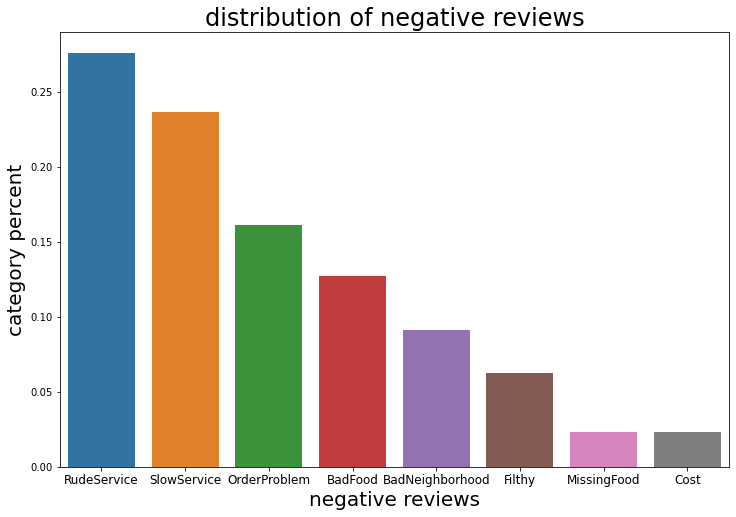

In [128]:
plt.figure(figsize=(12,8))
sns.barplot(df.senti.value_counts(normalize=True).index, 
            df.senti.value_counts(normalize=True).values)
plt.xlabel('negative reviews', fontsize=20)
plt.ylabel('category percent', fontsize=20)
plt.title('distribution of negative reviews', fontsize=24)
plt.xticks(fontsize=12)

__As we can see from the above graph and statistics, the negative reviews are very imbalanced, the most 2 significant negative reviews are 'RudeService' and 'SlowService'.__ 

__This EDA make perfect sense and is very consistent with reality. McDonald's are fast food restaurants, they just give you food upon receiving payment and communication is very limited. Many people including me, feel that they don't care how guests feel. Being rude in service will definitely give guests bad impression and will not have them come back again. Slow service is also intolerable because people want to save time when they decide to have fast food for a meal. Imagine that you are in drive-through lane for 3 minutes, waiting for your food in early Monday morning and you are staring to complain.__

__Also, as a franchise business, McDonald's stores shall not have many situations in which there are 'MissingFood' problems and 'Cost' problems (because their process is very mechanical and the cost of order do not vary much across the country).__

### 2.2 Review performances of McDanold's in different cities

In [129]:
df.groupby(['city'])['senti'].value_counts(normalize = True)

city      senti          
Atlanta   SlowService        0.298077
          RudeService        0.250000
          OrderProblem       0.163462
          BadFood            0.134615
          Filthy             0.105769
                               ...   
Portland  SlowService        0.094595
          BadNeighborhood    0.067568
          Filthy             0.067568
          Cost               0.027027
          MissingFood        0.013514
Name: senti, Length: 72, dtype: float64

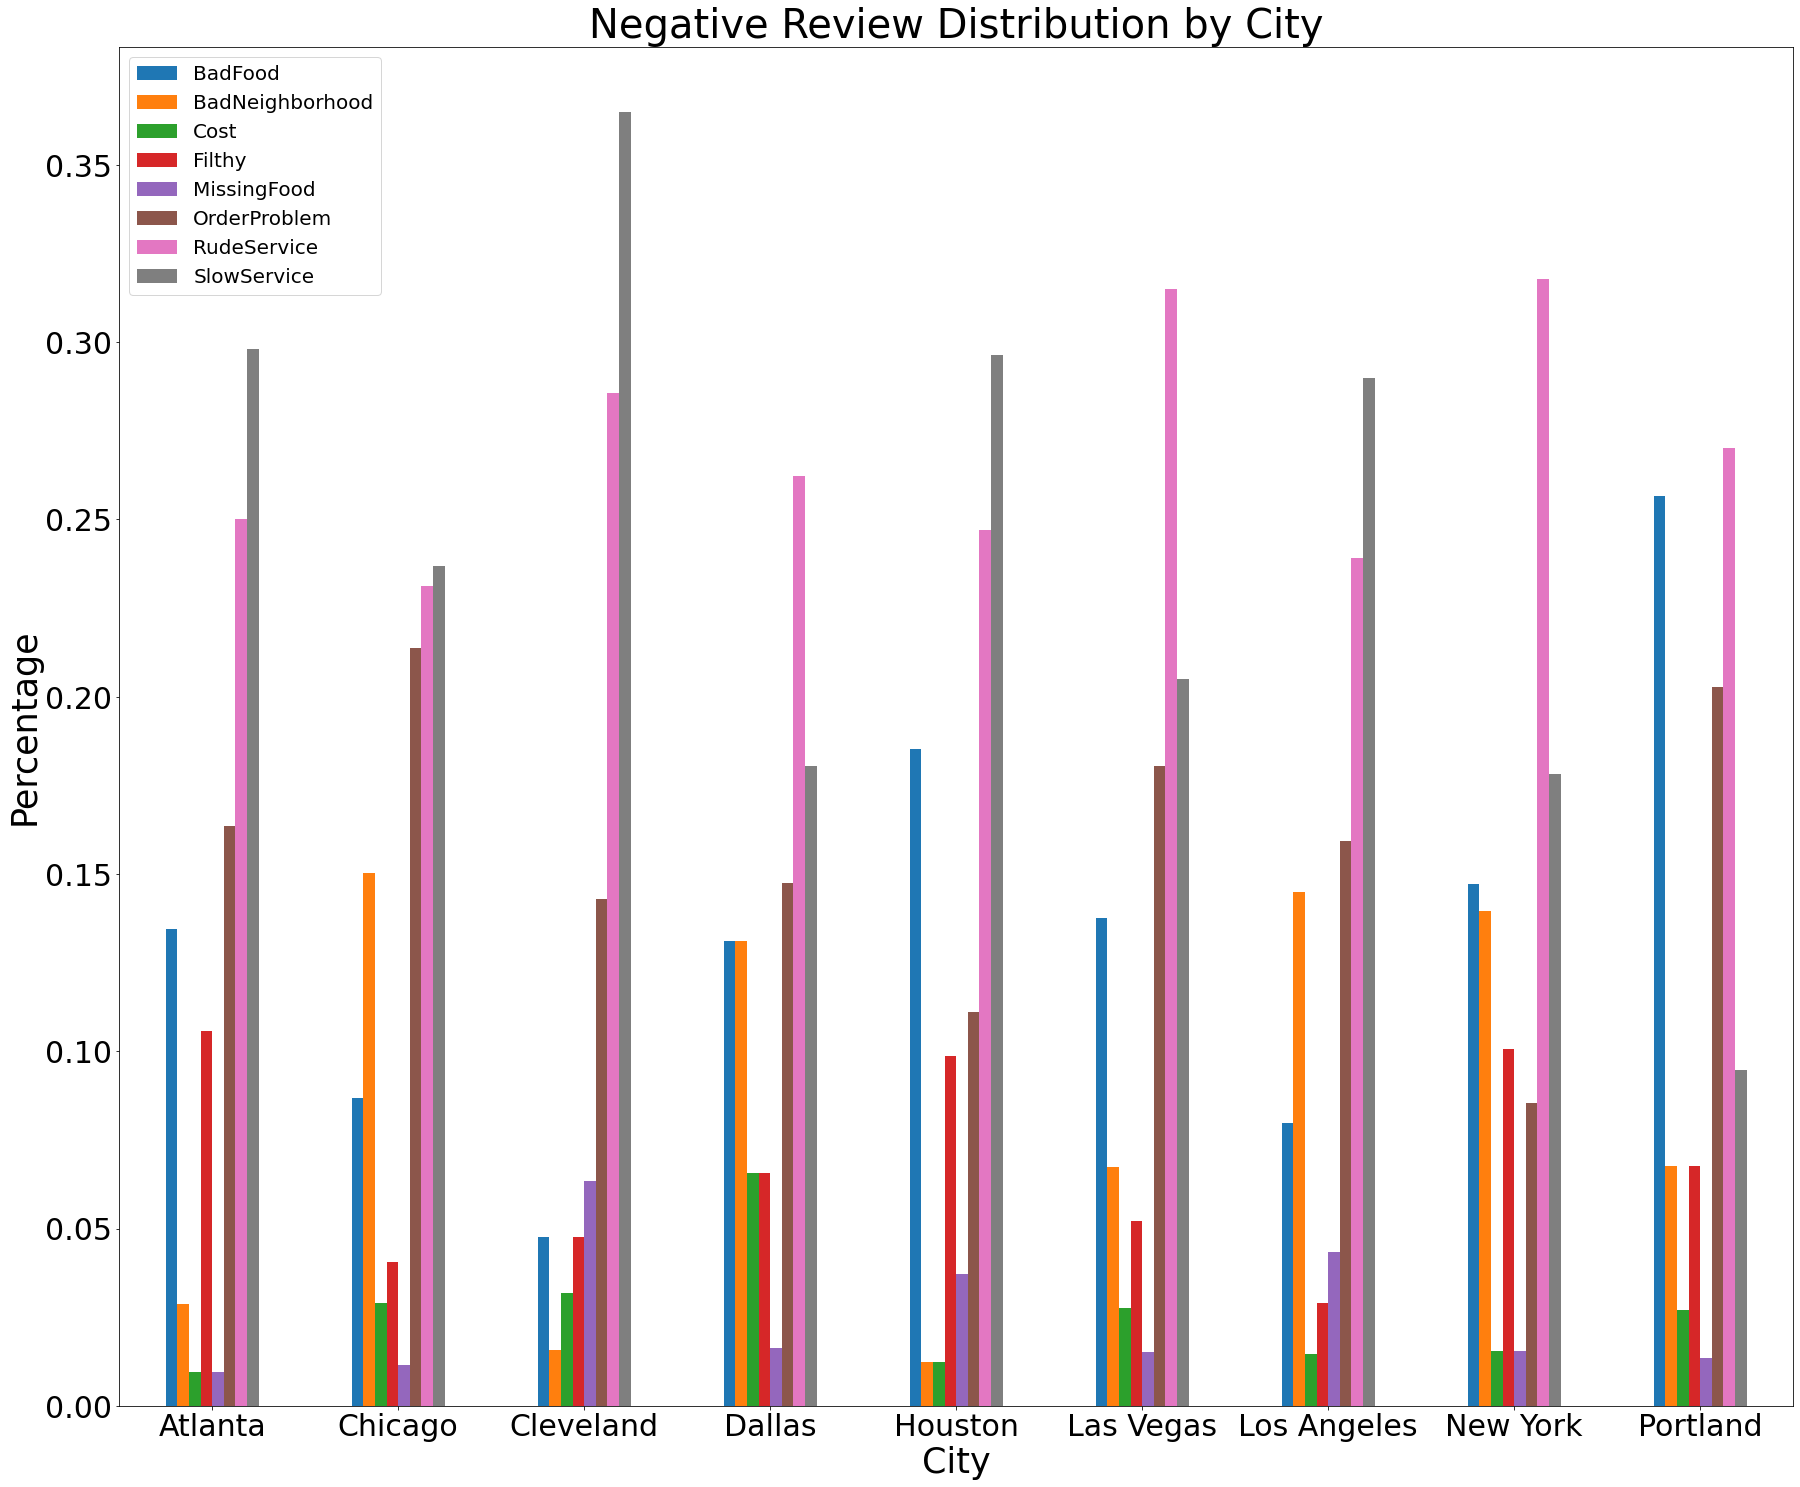

In [130]:
df.groupby(['city'])['senti'].value_counts(normalize = True).unstack(fill_value=0).plot.bar(figsize=(30,25))
plt.title('Negative Review Distribution by City', fontsize=40)
plt.xlabel('City', fontsize=35)
plt.ylabel('Percentage', fontsize=35)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)

__The above plot gives an idea what major problem are with McDonald's in different cities. 'RudeService' and 'SlowService' are the most significant problems for all these cities. Not surprising at all, as we discussed previously. But other minor complaint categories varies with different cities. For example, you can see 'BadNeighborhood' happens more frequently in Top Large Cities (NYC, Los Angeles, Chicago). This makes sense and is consistent with real life situation. In large cities, it is not uncommon to have impoverished areas or specific locations where crime rates are high. So a McDonald's being located their can potentially lead to customers feeling uncomfortable.__ 

__Also, we noticed that in NYC, the 'SlowService' complaint is relatively low. This is because slow service fast food cannot service in NYC, where pace of life is so fast and people cannot hardly wait for more than 1 minute.__

__This plot shall grab attention of McDonalds corporate executives, they shall understand how their franchise restaurants' performance varies across different cities and what are the major drawbacks in different locations, in order to enhance management and increase variouse staff training standards.__

### 2.3 FreqDist visualization analysis of words distribution in Rude Service and Slow Service review. 

We analyze the corpus of 2 most frequent classes of negative reviews, 'RudeService' and 'SlowService'. The target is to find out how people express their dissatisfaction with the fast food restaurant.

In [131]:
# extract all reviews of 'RudeService' and 'SlowService'
rude = df[df['senti']=='RudeService']['review'] + ' '
slow = df[df['senti']=='SlowService']['review'] + ' '

In [132]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
# raw string
tokenized_rude = tokenizer.tokenize(rude.sum())
tokenized_slow = tokenizer.tokenize(slow.sum())

In [133]:
len(tokenized_rude), len(tokenized_slow)

(37137, 29284)

In [134]:
lower_rude = [w.lower() for w in tokenized_rude]
lower_slow = [w.lower() for w in tokenized_slow]

In [135]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [136]:
# make stopwords list
stopwords_list=stopwords.words('english')+list(string.punctuation)+['Î','î','¾','one','mcdonald','Œæ','œæ','mcdonalds','mcd','mcds','mc','u']

In [137]:
filtered_rude=[]
for w in lower_rude:
    if w not in stopwords_list:
        filtered_rude.append(w)
        
filtered_slow=[]
for w in lower_slow:
    if w not in stopwords_list:
        filtered_slow.append(w)
        
len(filtered_rude), len(filtered_slow)

(17192, 13527)

In [138]:
lemmatizer = WordNetLemmatizer()
lemmatized_rude=[]
for w in filtered_rude:
    lemmatized_rude.append(lemmatizer.lemmatize(w))

lemmatized_slow=[]
for w in filtered_slow:
    lemmatized_slow.append(lemmatizer.lemmatize(w))

len(lemmatized_rude), len(lemmatized_slow)

(17192, 13527)

In [139]:
ps = PorterStemmer()
stem_rude=[]
for w in lemmatized_rude:
    stem_rude.append(ps.stem(w))

stem_slow=[]
for w in lemmatized_slow:
    stem_slow.append(ps.stem(w))

len(stem_rude), len(stem_slow)

(17192, 13527)

In [140]:
rude_dist = FreqDist(stem_rude)
print(rude_dist.most_common(40))

[('order', 367), ('servic', 214), ('get', 195), ('food', 194), ('go', 189), ('drive', 184), ('time', 156), ('manag', 153), ('custom', 152), ('thru', 137), ('like', 128), ('ask', 126), ('window', 122), ('place', 114), ('work', 110), ('back', 98), ('want', 97), ('give', 96), ('would', 95), ('wait', 94), ('rude', 94), ('employe', 94), ('worst', 91), ('even', 91), ('ever', 86), ('locat', 83), ('never', 80), ('say', 78), ('staff', 77), ('got', 74), ('coffe', 71), ('peopl', 70), ('come', 69), ('look', 67), ('went', 66), ('take', 64), ('could', 63), ('said', 62), ('make', 61), ('minut', 60)]


Graph the distribution of most frequent words

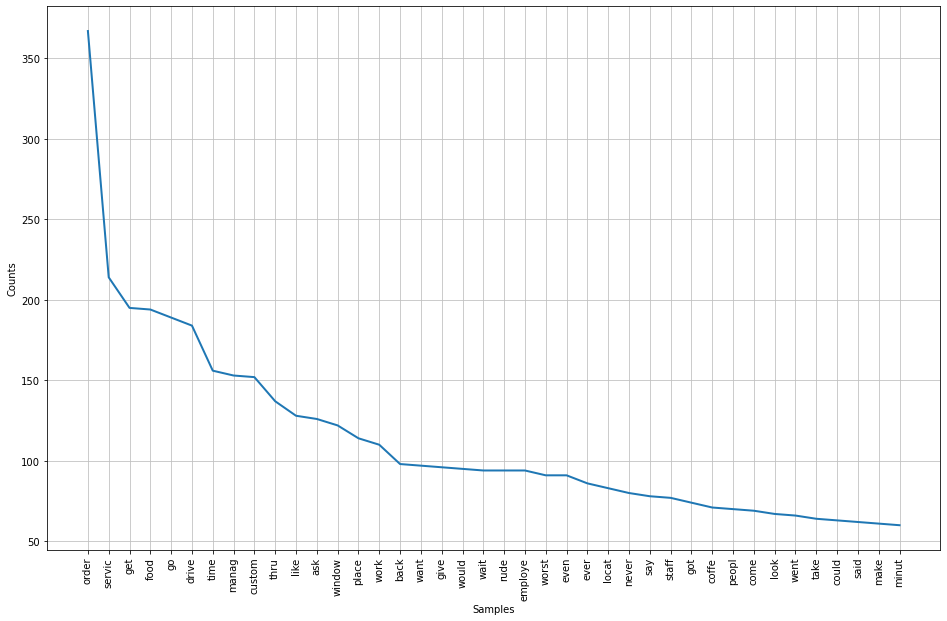

In [141]:
plt.figure(figsize=(16,10))
rude_dist.plot(40)

In [142]:
slow_dist = FreqDist(stem_slow)
print(slow_dist.most_common(40))

[('order', 313), ('food', 211), ('wait', 201), ('get', 187), ('drive', 186), ('time', 178), ('minut', 153), ('go', 146), ('servic', 143), ('thru', 123), ('place', 119), ('line', 117), ('slow', 116), ('locat', 98), ('peopl', 90), ('take', 84), ('ever', 79), ('ask', 75), ('would', 74), ('like', 72), ('custom', 69), ('alway', 68), ('even', 68), ('fast', 65), ('got', 65), ('window', 63), ('long', 62), ('back', 61), ('work', 61), ('worst', 60), ('manag', 59), ('fri', 57), ('2', 57), ('took', 54), ('come', 54), ('10', 53), ('car', 50), ('anoth', 49), ('never', 49), ('two', 47)]


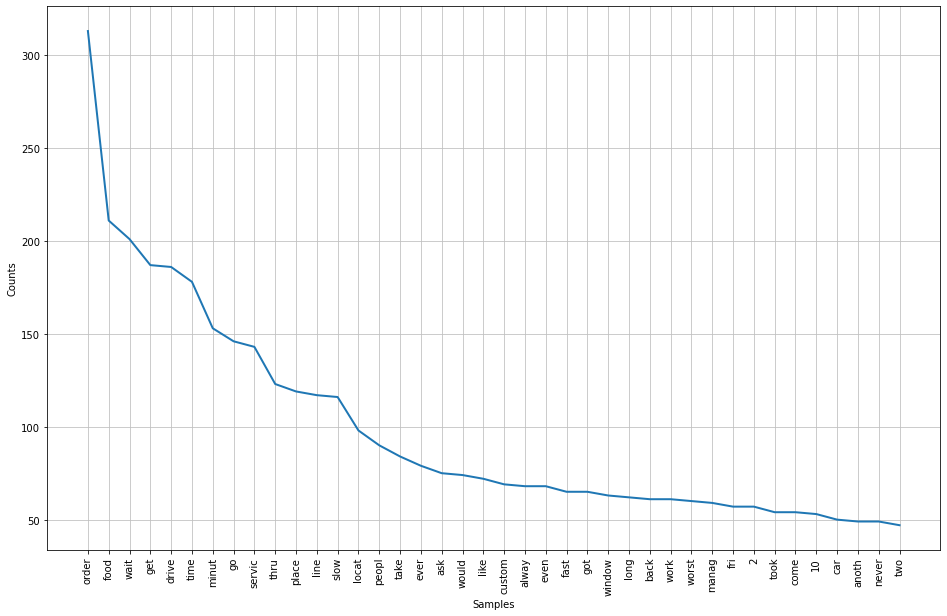

In [143]:
plt.figure(figsize=(16,10))
slow_dist.plot(40)

__As we can see from the above 2 plots, the most frequent 40 words in 'RudeService' and 'SlowService' range from frequency between more than 350 to 50. The common important words are 'order', 'food', 'get', 'service' (as you can imagine these appear very frequent in restaurant reviews, these are common non-stop words). What makes the these 2 review different are the mid-high frequent words such as 'rude', 'worst' in Rude Service Review and 'wait', 'minute' in Slow Service Review.__

### 2.4 More intuitive corpus statistics & visualization and frequent words exploratory

In [144]:
rude_word = [x[0] for x in rude_dist.most_common(40)]
rude_count = [x[1] for x in rude_dist.most_common(40)]

slow_word = [x[0] for x in slow_dist.most_common(40)]
slow_count = [x[1] for x in slow_dist.most_common(40)]

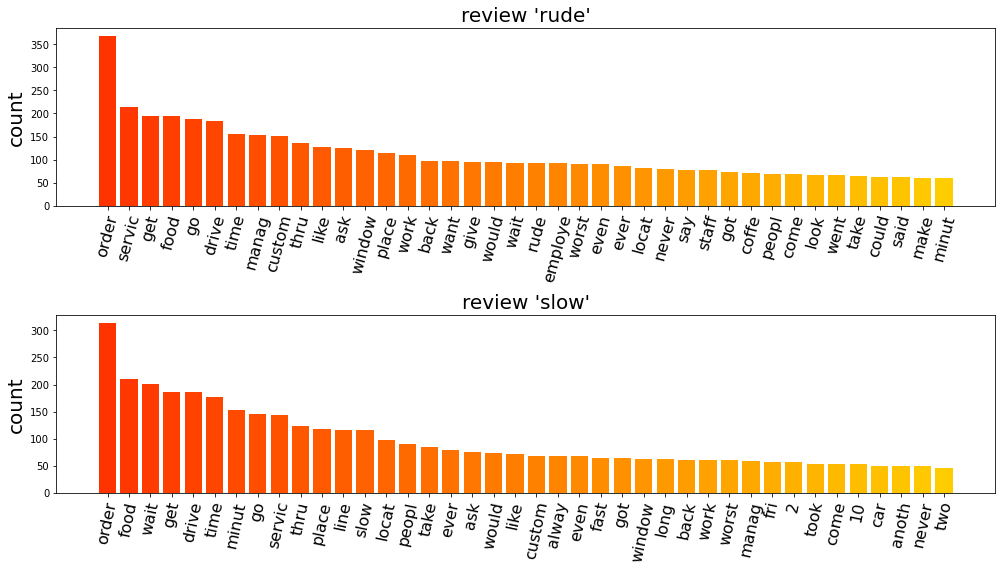

In [145]:
colors1 = cm.autumn_r(np.linspace(0.2,0.8,40))
colors1 = colors1[::-1]
count_figure = plt.figure(figsize=(14,8))

ax1 = count_figure.add_subplot(211)
ax2 = count_figure.add_subplot(212)

ax1.bar(rude_word, rude_count, color = colors1)
ax2.bar(slow_word, slow_count, color = colors1)

ax1.set_title("review 'rude'",fontsize=20)
ax2.set_title("review 'slow'",fontsize=20)

ax1.set_ylabel('count', fontsize=20)
ax2.set_ylabel('count', fontsize=20)

plt.sca(ax1)
plt.xticks(rotation=75, fontsize=16)
plt.sca(ax2)
plt.xticks(rotation=78, fontsize=16)

plt.tight_layout(pad=1)

__The above 4 plots gave us an idea about how guests express the dissatisfaction of McDonald's. The graphes are very self-explanatory and are consistent with people's daily expressions. As you can see from the 'SlowService' review plot, there are words frequently appear like 'wait', 'minute', 'slow', 'long', etc, all of which are concerns about time. Also in 'RudeService', there are frequent words like 'manager', 'customer', 'work', 'rude', 'staff', all of which are related to what people say when they complain about restaurant people and their attitudes.__ 

__EDA here are very consistent with our daily life.__

## 3. Preprocessing and Feature Engineering

### 3.1 Create new column with classifying integers to represent sentiment classes

In [637]:
# represent sentiment values by integers to prepare for classification latter
df['sent'] = np.where(df['senti'] == 'RudeService', 1, df['senti'])
df['sent'] = np.where(df['senti'] == 'SlowService', 2, df['sent'])
df['sent'] = np.where(df['senti'] == 'OrderProblem', 3, df['sent'])
df['sent'] = np.where(df['senti'] == 'BadFood', 4, df['sent'])
df['sent'] = np.where(df['senti'] == 'BadNeighborhood', 5, df['sent'])
df['sent'] = np.where(df['senti'] == 'Filthy', 6, df['sent'])
df['sent'] = np.where(df['senti'] == 'MissingFood', 7, df['sent'])
df['sent'] = np.where(df['senti'] == 'Cost', 8, df['sent'])

In [638]:
df.sent.value_counts()

1    337
2    289
3    197
4    155
5    111
6     76
8     28
7     28
Name: sent, dtype: int64

In [639]:
df.senti.value_counts()

RudeService        337
SlowService        289
OrderProblem       197
BadFood            155
BadNeighborhood    111
Filthy              76
MissingFood         28
Cost                28
Name: senti, dtype: int64

### 3.2 Make new feature 'senti_pol' using TextBlob to get sentiments automatically and to compare with our target sentiments

__From the EDA section, we know that negative reviews vary in different cities, now we can see from TextBlob.polarity how is McDonald's store perform in different cities.__

In [149]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [640]:
df['senti_pol'] = df.review.apply(detect_sentiment)

In [641]:
df.groupby(['city'])['senti_pol'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Atlanta,104.0,-0.036259,0.209709,-0.650000,-0.164167,-0.012500,0.071002,0.700000
Chicago,173.0,-0.048061,0.233647,-1.000000,-0.154805,-0.004762,0.077273,0.577778
Cleveland,63.0,-0.079588,0.220586,-0.587500,-0.163355,-0.031181,0.048489,0.300000
Dallas,61.0,-0.001240,0.200034,-0.442857,-0.130051,0.002083,0.100000,0.781250
Houston,81.0,-0.051547,0.209129,-0.926667,-0.157652,-0.016667,0.065344,0.336111
Las Vegas,327.0,-0.060980,0.229384,-1.000000,-0.185078,-0.043519,0.079399,0.700000
Los Angeles,138.0,-0.037068,0.222257,-0.750000,-0.129911,-0.027001,0.115083,0.600000
New York,129.0,-0.019838,0.259415,-0.800000,-0.130556,0.007937,0.097669,1.000000
Portland,74.0,-0.004563,0.215332,-0.588889,-0.121554,0.000000,0.113359,0.937500


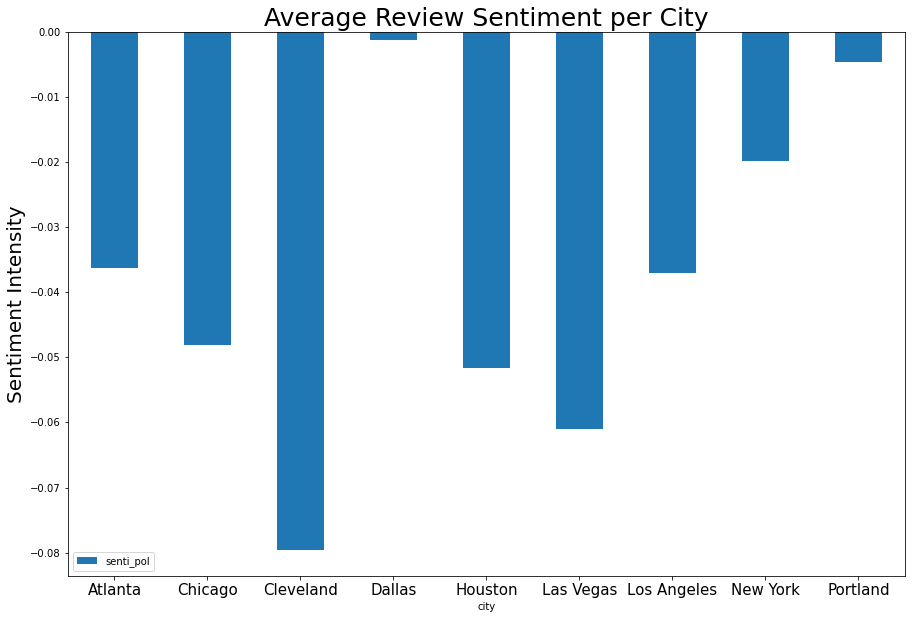

In [152]:
df.groupby(['city'])['senti_pol'].mean().plot.bar(figsize=(15,10))
plt.title('Average Review Sentiment per City', fontsize=25)
plt.ylabel('Sentiment Intensity', fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

__The above graph shows the intensity of negative reviews by sentiment analyzer from TextBlob for each city. It is no surprise that Cleveland stands out again. We can see the mean sentiment values by TextBlob for all cities are all negative, meaning that TextBlob classified sentiment are generally consistent with the original dataset review orientation.__

### 3.3 process the whole 'review' column and prepare for TFIDF

__From the previous EDA section, we have got an idea about important words and unimportant words, now we are going to remove unimportant words by defining function that removes all stopwords, punctuations & unimportant words as well as signs in all reviews.__

In [153]:
reviews = df['review']
target = df['sent']

In [154]:

def reduce(text):
    tokens = tokenizer.tokenize(text) # tokenize every review
    removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return removed

In [155]:
# remove all stopwords, punctuations & unimportant words from the reviews and make a list
processed_data = list(map(reduce, reviews))

__Since the NLP in this project is a very practical, real life case, we need to try (1) only stemming, (2) only lemmatization, (3) combination (stemming first) and (4) combination (lemmatizing first) to see which one performs best.__

In [156]:
# firstly lemmatize and then stem all the reviews

review_clean = []
for j in processed_data:
    lem = [lemmatizer.lemmatize(w) for w in j]
    ste = ' '.join([ps.stem(wo) for wo in lem])
    review_clean.append(ste)

In [157]:
Xc = review_clean
yc = target

In [158]:
yc = yc.astype('int')

In [159]:
# firstly stem and then lemmatize all the reviews

review_clean1 = []
for j in processed_data:
    ste = [ps.stem(wo) for wo in j]
    lem = ' '.join([lemmatizer.lemmatize(w) for w in ste])
    review_clean1.append(lem)

In [160]:
Xc1 = review_clean1
yc1 = target

In [161]:
yc1 = yc1.astype('int')

In [162]:
# only stemming

review_clean2 = []
for j in processed_data:
    ste = ' '.join([ps.stem(w) for w in j])
    review_clean2.append(ste)

In [163]:
Xc2 = review_clean2
yc2 = target

In [164]:
yc2 = yc2.astype('int')

In [165]:
# only lemmatizing

review_clean3 = []
for j in processed_data:
    lem = ' '.join([lemmatizer.lemmatize(w) for w in j])
    review_clean3.append(lem)

In [166]:
Xc3 = review_clean3
yc3 = target

In [167]:
yc3 = yc3.astype('int')

### 3.4 TFIDF transform of each processed groups

In [168]:
# firstly lemmatize and then stem all the reviews

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=1)
tfVectorizer = TfidfVectorizer()

Xc_train_tf = tfVectorizer.fit_transform(Xc_train)
Xc_test_tf = tfVectorizer.transform(Xc_test)

In [169]:
# firstly stem and then lemmatize all the reviews

Xc1_train, Xc1_test, yc1_train, yc1_test = train_test_split(Xc1, yc1, test_size=0.2, random_state=1)
tfVectorizer = TfidfVectorizer()

Xc1_train_tf = tfVectorizer.fit_transform(Xc1_train)
Xc1_test_tf = tfVectorizer.transform(Xc1_test)

In [552]:
# only stemming

Xc2_train, Xc2_test, yc2_train, yc2_test = train_test_split(Xc2, yc2, test_size=0.2, random_state=1)
tfVectorizer_stem = TfidfVectorizer()

Xc2_train_tf = tfVectorizer_stem.fit_transform(Xc2_train)
Xc2_test_tf = tfVectorizer_stem.transform(Xc2_test)

In [171]:
# only lemmatizing

Xc3_train, Xc3_test, yc3_train, yc3_test = train_test_split(Xc3, yc3, test_size=0.2, random_state=1)
tfVectorizer = TfidfVectorizer()

Xc3_train_tf = tfVectorizer.fit_transform(Xc3_train)
Xc3_test_tf = tfVectorizer.transform(Xc3_test)

## 4. Various Model Fitting

### 4.1 Try Random Forest and Naive Bayes Classifier

__2 models -- Random Forest and Naive Bayes are tried on all 4 sets of preprocessed data: (1) only stemming, (2) only lemmatization, (3) combination (stemming first) and (4) combination (lemmatizing first) to see which one performs best.__

In [522]:
rf_classifier = RandomForestClassifier(n_estimators=250)

In [436]:
nb_classifier = MultinomialNB(alpha=0.15, fit_prior=False)

In [275]:
# firstly lemmatize and then stem all the reviews random forest

rf_classifier.fit(Xc_train_tf, yc_train)
yc_preds = rf_classifier.predict(Xc_test_tf)
print('random forest accuracy:',accuracy_score(yc_test, yc_preds),
      'random forest f1:',f1_score(yc_test, yc_preds, average = 'weighted'))

random forest accuracy: 0.5959183673469388 random forest f1: 0.5768140560806009


In [345]:
# firstly lemmatize and then stem all the reviews naive bayes

nb_classifier.fit(Xc_train_tf, yc_train)
yc_preds = nb_classifier.predict(Xc_test_tf)
print('naive bayes accuracy:',accuracy_score(yc_test, yc_preds),
      'naive bayes f1:',f1_score(yc_test, yc_preds, average = 'weighted'))

naive bayes accuracy: 0.5306122448979592 naive bayes f1: 0.5065849897271162


In [285]:
# firstly stem and then lemmatize all the reviews random forest

rf_classifier.fit(Xc1_train_tf, yc1_train)
yc1_preds = rf_classifier.predict(Xc1_test_tf)
print('random forest accuracy:',accuracy_score(yc1_test, yc1_preds),
      'random forest f1:',f1_score(yc1_test, yc1_preds, average = 'weighted'))

random forest accuracy: 0.5918367346938775 random forest f1: 0.5725310584556736


In [286]:
# firstly stem and then lemmatize all the reviews naive bayes

nb_classifier.fit(Xc1_train_tf, yc1_train)
yc1_preds = nb_classifier.predict(Xc1_test_tf)
print('naive bayes accuracy:',accuracy_score(yc1_test, yc1_preds),
      'naive bayes f1:',f1_score(yc1_test, yc1_preds, average = 'weighted'))

naive bayes accuracy: 0.5306122448979592 naive bayes f1: 0.5065849897271162


In [615]:
# only stemming

rf_classifier.fit(Xc2_train_tf, yc2_train)
yc2_preds = rf_classifier.predict(Xc2_test_tf)
print('random forest accuracy:',accuracy_score(yc2_test, yc2_preds),
      'random forest f1:',f1_score(yc2_test, yc2_preds, average = 'weighted'))

random forest accuracy: 0.6204081632653061 random forest f1: 0.5987953990158914


In [291]:
# only stemming

nb_classifier.fit(Xc2_train_tf, yc2_train)
yc2_preds = nb_classifier.predict(Xc2_test_tf)
print('naive bayes accuracy:',accuracy_score(yc2_test, yc2_preds),
      'naive bayes f1:',f1_score(yc2_test, yc2_preds, average = 'weighted'))

naive bayes accuracy: 0.5265306122448979 naive bayes f1: 0.5030417451480265


In [307]:
print('the confusion matrix')
print(confusion_matrix(yc2_test, yc2_preds))

the confusion matrix
[[51  5  4  1  2  0  0  0]
 [14 50  1  0  1  0  0  0]
 [12  4 19  5  1  0  0  0]
 [ 7  7  5 20  0  0  0  0]
 [ 4  3  1  0  7  0  0  0]
 [ 6  2  0  0  2  2  0  0]
 [ 0  1  0  2  0  0  1  0]
 [ 2  0  0  3  0  0  0  0]]


In [327]:
# only lemmatizing

rf_classifier.fit(Xc3_train_tf, yc3_train)
yc3_preds = rf_classifier.predict(Xc3_test_tf)
print('random forest accuracy:',accuracy_score(yc3_test, yc3_preds),
      'random forest f1:',f1_score(yc3_test, yc3_preds, average = 'weighted'))

random forest accuracy: 0.5306122448979592 random forest f1: 0.5052687246145329


In [328]:
# only lemmatizing

nb_classifier.fit(Xc3_train_tf, yc3_train)
yc3_preds = nb_classifier.predict(Xc3_test_tf)
print('naive bayes accuracy:',accuracy_score(yc3_test, yc3_preds),
      'naive bayes f1:',f1_score(yc3_test, yc3_preds, average = 'weighted'))

naive bayes accuracy: 0.5102040816326531 naive bayes f1: 0.48227848733036865


### 4.2 GridSearch for best hypeparameter tuning for NBclassifier

In [329]:
from sklearn.model_selection import GridSearchCV

In [330]:
nb_params = {'alpha': [0.01,0.03,0.05,0.07,0.09,0.11,0.13,0.15,0.17,0.19],
              'fit_prior': [True, False],
              'class_prior': [[1,2,3,4,5,6,7,8],[8,7,6,5,4,3,2,1]]}

In [338]:
NB = MultinomialNB()

In [340]:
grid_nb = GridSearchCV(NB, param_grid=nb_params, cv=7, scoring='accuracy', verbose =1, n_jobs=-1)
grid_nb.fit(Xc_train_tf, yc_train)

Fitting 7 folds for each of 40 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    4.1s finished


GridSearchCV(cv=7, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13,
                                   0.15, 0.17, 0.19],
                         'class_prior': [[1, 2, 3, 4, 5, 6, 7, 8],
                                         [8, 7, 6, 5, 4, 3, 2, 1]],
                         'fit_prior': [True, False]},
             scoring='accuracy', verbose=1)

In [341]:
# examine the best model
print(grid_nb.best_score_)
# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_nb.best_params_)
# Shows default parameters that we did not specify
print(grid_nb.best_estimator_)
#Identify the best score during fitting with cross-validation

0.4968947291146675
{'alpha': 0.19, 'class_prior': [1, 2, 3, 4, 5, 6, 7, 8], 'fit_prior': True}
MultinomialNB(alpha=0.19, class_prior=[1, 2, 3, 4, 5, 6, 7, 8])


In [403]:
# use the best Naive Bayes to predict and check the scores
yc_preds_NB = grid_nb.best_estimator_.predict(Xc_test_tf)
print('naive bayes accuracy:',accuracy_score(yc_test, yc_preds_NB),
      'naive bayes f1:',f1_score(yc_test, yc_preds_NB, average = 'weighted'))

naive bayes accuracy: 0.4897959183673469 naive bayes f1: 0.48575932287212925


__As we can see here gridsearch of Naive Bayes does not give better than what we previously have with alpha=0.15, fit_prior=False as hyperparameters.__

### 4.3 Use ADASYN and SMOTE to deal with imbalance to see if a better model can be gained

__As this is a highly imbalanced multi-class case, in order to improve the model, we can try to use ADASYN and SMOTE__

check the shape of sparse matrix

In [347]:
Xc2_train_tf

<976x4785 sparse matrix of type '<class 'numpy.float64'>'
	with 38739 stored elements in Compressed Sparse Row format>

In [348]:
Xc2_train_tf.todense().shape

(976, 4785)

In [349]:
Xc2_test_tf

<245x4785 sparse matrix of type '<class 'numpy.float64'>'
	with 9627 stored elements in Compressed Sparse Row format>

__Try ADASYN to upsample__

In [352]:
ada = ADASYN(sampling_strategy = 'minority', random_state=1)
Xc2_train_tf_ada, yc2_train_ada = ada.fit_resample(Xc2_train_tf, yc2_train)

In [386]:
rf_classifier.fit(Xc2_train_tf_ada, yc2_train_ada)
yc2_preds_ada = rf_classifier.predict(Xc2_test_tf)
print('random forest accuracy:', accuracy_score(yc2_test, yc2_preds_ada),
      'random forest f1:', f1_score(yc2_test, yc2_preds_ada, average='weighted'))

random forest accuracy: 0.5918367346938775 random forest f1: 0.5745163473781577


In [404]:
nb_classifier.fit(Xc2_train_tf_ada, yc2_train_ada)
yc2_preds_ada = nb_classifier.predict(Xc2_test_tf)
print('naive bayes:', accuracy_score(yc2_test, yc2_preds_ada),
      'naive bayes f1:', f1_score(yc2_test, yc2_preds_ada, average='weighted'))

naive bayes: 0.5224489795918368 naive bayes f1: 0.5024838277312172


__Try SMOTE to upsample__

In [384]:
from imblearn.over_sampling import SMOTE

In [385]:
sm = SMOTE(sampling_strategy='minority', random_state=1)
Xc2_train_tf_sm, yc2_train_sm = sm.fit_resample(Xc2_train_tf, yc2_train)

In [397]:
rf_classifier.fit(Xc2_train_tf_sm, yc2_train_sm)
yc2_preds_sm = rf_classifier.predict(Xc2_test_tf)
print('random forest accuracy:', accuracy_score(yc2_test, yc2_preds_sm),
      'random forest f1:', f1_score(yc2_test, yc2_preds_sm, average='weighted'))

random forest accuracy: 0.5918367346938775 random forest f1: 0.5742050597171319


In [405]:
nb_classifier.fit(Xc2_train_tf_sm, yc2_train_sm)
yc2_preds_sm = nb_classifier.predict(Xc2_test_tf)
print('naive bayes accuracy:', accuracy_score(yc2_test, yc2_preds_sm),
      'naive bayes f1:', f1_score(yc2_test, yc2_preds_sm, average='weighted'))

naive bayes accuracy: 0.5224489795918368 naive bayes f1: 0.5024838277312172


As we can see here, upsampling by ADASYN and SMOTE does not help to get better F1 and accuracy scores

## 5. Models Evaluation and Results Discussion

__5.1 The metrics we used to evaluate our models are the accuracy score and weighted f1 score, as shown in section 4__.  We have 8 categories of negative reviews (RudeService, SlowService, OrderProblem, BadFood, BadNeighborhood, Filthy, MissingFood and Cost) in this case, and they are highly imbalanced (the major 2 classes are 'RudeService' and 'SlowService' and account for 52% of all negative reviews; while the minor classes, 'MissingFood' or 'Cost' for example, account for just around 2% of all negative reviews). In our case, after thorough discussion, __we are not leaning to any specific class.__ Although BadNeighborhood and Cost problems may not be easily solved by the restaurant manager, all other classes are very important from management point of view. So precision and recall are not what we prioritized as our evaluation metrics. We used an accuracy score and a weighted f1 socre as metrics to evaluate models. We used __weighted f1 score__ because we want to take the class imbalance into account, and calculate the metric for each label and find their average weighted by support(number of true predictions for each class label).

__5.2 Based on fitting various models, tuning hyperparameters, and gridsearching__ in section 4, we found that the Random Forest Model has the best accuracy score and f1 score. Naive Bayes with alpha=0.15 performs close to Random Forest classifier. After we used TFIDF to make a sparse matrix of features with many columns, the Random Forest model performed much better than Naive Bayes. But when we tune the alpha in Naive Bayes to 0.15 (instead of default alpha =1), the Naive Bayes model improves and gets close to Random Forest. This is because there are many 0 values in the TFIDF transformed matrix and not uniformly distributed (when in the test set, there can be cases where we encounter a word which is not present in train set then its probability of existence in a class is zero, making the whole probability 0) The Naive Bayes algorithm __needs an alpha hyperparameter to do Laplace smoothing__, we need to tune the alpha to reach the best performance of Naive Bayes, so we cannot just use the default input. 

__5.3 The way we preprocess the data really has an influence on prediction__. The way the corpus is preprocessed will differentiate the results. For example, in this project, we found out that stemming works better than lemmatization while normally lemmatization will do a better job than stemming. This is because we are dealing with Yelp reviews. When writing Yelp reviews, many people do not pay attention to proper grammar rules, some times not even completing words, they don't fully complete their sentances and they are trying to write as simple as possible as long as they can express their dissatisfaction. In this particular case, it makes sense that stemming works better. Thus, in NLP, data scientists shall firstly look into the corpus, understand how the texts look like and then determine which preprocessing steps make sense. 

__5.4 Limitations of this project and how we can get better__. We tried various ways (gridsearch, ADASYN, SMOTE) to improve our classifier in section 4. Our best accuracy score is 0.62 and  best weighted f1 score is 0.60, which we think is good enough for a highly imbalanced 8 classes case. There are 3 important limitations we have here: (1) limited observations (since we only focused on negative reviews), we only have 1221 observations, which is not neccessarily enough for a highly imbalanced 8 classes NLP case, especially for minor classes, there are not enough observations to train; (2) some reviews have multiple complaints, as you can imagine, when people are writing reviews, they often complain about more than one thing, this make it difficult to classify the reviews into one specific category; (3) there are too many 'freestyle writing' observations in Yelp reviews. Literally, people can write about any irrelevant subject in their Yelp review. For example, we found several reviews where people are complaining that they lost their job, lost their wife, their life is miserable, or even that their car got towed. Instances like this can make it difficult for an NLP model to have accurate classification for reviews. While it is impossible to change people's reviews, we believe getting more negative review observations (maybe more than 10,000 observations) will yield better results for the model. 

#### 5.5 This is the most exciting part! Now we have our model, let's use it to classify reviews of another similar fast food restaurant -- KFC !

In [642]:
kfc_df = pd.read_csv('kfc.csv')
kfc_df.head(2)

,Unnamed: 0,id_x,url,text,rating_x,time_created,user,index,id_y,alias,...,review_count,categories,rating_y,coordinates,transactions,price,location,phone,display_phone,distance
0,0,fcWBPRhYHm4RaAtQtw4tMg,https://www.yelp.com/biz/kfc-atlanta-15,I went here tonight to get some food with my f...,1,2019-12-25 18:13:27,"{'id': 'qO6mPdJF05r3486qxymr9g', 'profile_url'...",0,xzpiWdfwqF-8lDpAjAzdCg,kfc-atlanta-15,...,23,"[{'alias': 'chicken_wings', 'title': 'Chicken ...",2.0,"{'latitude': 33.8572519952499, 'longitude': -8...","['delivery', 'pickup']",$,"{'address1': '3901 Buford Hwy NE', 'address2':...",1.404635e+10,(404) 634-8416,7487.599592
1,1,JyX3CYdswnBkZ2shG6c__A,https://www.yelp.com/biz/kfc-atlanta-15,Two lousy buckets of chicken in two months. We...,1,2020-04-20 21:21:12,"{'id': 'DxrsfOSpHLkK4JqrcNCpVQ', 'profile_url'...",0,xzpiWdfwqF-8lDpAjAzdCg,kfc-atlanta-15,...,23,"[{'alias': 'chicken_wings', 'title': 'Chicken ...",2.0,"{'latitude': 33.8572519952499, 'longitude': -8...","['delivery', 'pickup']",$,"{'address1': '3901 Buford Hwy NE', 'address2':...",1.404635e+10,(404) 634-8416,7487.599592


In [643]:
kfc_review = kfc_df['text']

In [644]:
# make stopwords list
stopwords_kfc=stopwords.words('english')+list(string.punctuation)+['Î','î','¾','one','kfc','Œæ','œæ','u']

In [645]:
def reduce_kfc(text):
    tokens = tokenizer.tokenize(text) # tokenize every review
    newdata = [token.lower() for token in tokens if token.lower() not in stopwords_kfc]
    return newdata

In [646]:
# remove all stopwords, punctuations & unimportant words from the reviews and make a list
kfc_data = list(map(reduce_kfc, kfc_review))
# stemming data
kfc_clean = []
for j in kfc_data:
    ste = ' '.join([ps.stem(w) for w in j])
    kfc_clean.append(ste)

In [647]:
# classify the negative kfc reviews !
kfc_tf = tfVectorizer_stem.transform(kfc_clean)
kfc_preds = rf_classifier.predict(kfc_tf)

In [648]:
# add a column of classified kfc reviews back to kfc dataframe
kfc_df['senti'] = kfc_preds
kfc_df['sentiment'] = np.where(kfc_df['senti'] == 1, 'RudeService', kfc_df['senti'])
kfc_df['sentiment'] = np.where(kfc_df['senti'] == 2, 'SlowService', kfc_df['sentiment'])
kfc_df['sentiment'] = np.where(kfc_df['senti'] == 3, 'OrderProblem', kfc_df['sentiment'])
kfc_df['sentiment'] = np.where(kfc_df['senti'] == 4, 'BadFood', kfc_df['sentiment'])
kfc_df['sentiment'] = np.where(kfc_df['senti'] == 5, 'BadNeighborhood', kfc_df['sentiment'])
kfc_df['sentiment'] = np.where(kfc_df['senti'] == 6, 'Filthy', kfc_df['sentiment'])
kfc_df['sentiment'] = np.where(kfc_df['senti'] == 7, 'MissingFood', kfc_df['sentiment'])
kfc_df['sentiment'] = np.where(kfc_df['senti'] == 8, 'Cost', kfc_df['sentiment'])

#### Now let us check out how it works on KFC reviews !! We take a look at the first 10 columns. 

In [652]:
pd.set_option('display.max_colwidth', -1)
kfc_df[['text','sentiment']].head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,text,sentiment
0,I went here tonight to get some food with my friend and from the time I pulled up to order my food and get my food it was already a terrible...,OrderProblem
1,Two lousy buckets of chicken in two months. We used to love KFC but this specific restaurant has killed our taste for KFC. The last 12 piece bucket we...,BadFood
2,"On several occasions I've come maybe an hour or so before close (9:45-9:50 and they ""supposedly"" close at 11 pm) and they're ALWAYS ""out"" of everything...",RudeService
3,"Rude and ghetto , you will be talking to\n2 different ppl at the driver thru every time and will short you on your order.",RudeService
4,"Would leave a once star review if i could.\nI ordered the $30 fill up. once I got home (7 miles away), I discovered they had not included the chicken strip...",OrderProblem
5,I ordered online and set it to be delivered. I waited 29 minutes after it was supposed to be delivered before going up to the restaurant and grabbing the...,SlowService
6,"I should have read the reviews before walked in the door. Coming from out of state, I thought all KFCs had a standard... boy was I mistaken.\n\nFor starters...",RudeService
7,Was it everyone's first day?! Jesus! And by everyone I mean all 3 employees. Waited 30 minutes for food and it was not even right. These people need to...,SlowService
8,Terrible service. Just took 37 minutes to get our food after all we got was a sorry it'll be 5 more minutes. Manager refused to give money back. Shiniqua...,RudeService
9,"Usually the service is pretty good here.\n\nHowever, the last several times I have visited this location, there is either a long wait time, or they get my...",SlowService


#### Since Yelp does not give classification of negative reviews of restaurants, we can look into the the review text to see how our model works. Let's take a look at the first 10 reviews. 

__1. Cannot really determine, it can be 'BadFood' or 'OrderProblem', so model is half correct;__

__2. Prediction is correct;__

__3. Cannot determine, but the most close is 'OrderProblem' or 'RudeService', so model is half correct;__

__4. Prediction is correct;__

__5. Shall be MissingFood;__

__6. Prediction is correct;__

__7. Cannot determine;__

__8. Prediction is correct;__

__9. Can be 'RudeService' or 'SlowService', so prediction is half correct;__

__10. Prediction is correct;__

#### From these sample observations, we can see our classification is 70% correct ! This NLP classifier works well! 

We can also check the reviews that are labeled with 'Filthy' by our classifier as following:

In [655]:
# check out what is the reviews classified as 'Filthy'
kfc_df[kfc_df['sentiment']=='Filthy']['text'].head(5)

169    The temperature in this place is always sub 65 degrees. Which may explain why at high noon less than 15% of the place is filled. They did at least fix the... 
193    Horrible place to eat. Lobby was always dirty. Never had food prepared I thought this was supposed to a be fast food place? Employees were like animals!!!... 
256    [3/16/2016]\n\nDon't come here... just don't. This place has a good price. But the food is absolutely nasty and bland. The Resturant is VERY DIRTY! How do... 
282    In this photo you'll see a garbage can, dirty pans and raw chicken left out next to it. Just paid $40.58 not for my family to eat food left next to garbage...
391    Dirty restaurant,  employees clearly don't care, walked in and walked straight out... health department needs to come inspect asap...                         
Name: text, dtype: object

__As we can see from above, 4 of 5 reviews are correctly labeled as 'Filthy'__

In [656]:
# Since our classifier work well, we need to save this classifier

import pickle
filename1 = 'reviewclassifier.sav'
pickle.dump(rf_classifier, open(filename1, 'wb'))

## 6. Business Case & Conclusions

6.1 There is fierce competition in the fast food industry. For McDonald's, it faces competition from local food outlets to global fast food chains. The franchise competes directly with similar fast food establishments like KFC, Wendy's, Burger Kings, Dunkin Donuts, etc. Dunkin Donuts for example, has made some headway in the fast food business and had planned to double the number of their locations ever since the beginning of 2018. It is common sense that restaurants need to improve customer satisfaction in order to increase their overall business and develop customer loyalty. How should one look into customer satisfaction? Reviews from guests have shown to be the most important resource. However, looking through thousands of customer reviews can be time-consuming, frustrating, and inefficient. __Moreover, third party platforms like Yelp simply display ratings without information regarding why reviews are negative (e.g the type of drawbacks).__ 

__6.2 Negative reviews are important__ because negative reviews provide information that can help restaurants on what improvements to make. The NLP review classifier we developed in this project deals with negative reviews specifically. The classifier can  __help restaurant managers classify the negative reviews, indentify where they went wrong, save time in getting customer feedback, and finally focus on specific approaches to better guest satisfaction. This is why this project can be very meaningful and useful.__ 

6.3 Among all negative review categories, 'RudeService' and 'SlowService' are the major classes. This is shown in our reviews' statistical analysis and validated in the KFC reviews. These 2 points shall address attention of fast food restaurant managers. __You cannot treat guests poorly just because you are selling fast food!__ Every one cares about how he/she is served regardless if they're staying for just 1 minute in fast food restaurant or 2 hours in a fancier sit-down establishment. 

Recommendations: McDonald's store managers should pay close attention to employees' attitude towards guests. 

SlowService is the second major complaint among customers. One of the main reasons that people choose to eat fast food is to save time. Our SlowService corpus statistics show that people are complaining about less staff, long wait time, etc. 

Recommendations: Restaurant managers should arrange more staff to work during rush hours or establish a more efficient process to serve guests. 

6.4 Surprisingly, McDonald's stores also have 'BadFood' and 'Filthy' problems. The 'BadFood' class is around 13% percent of customer complaints. Our classifier also identifies a similar 'BadFood' problem in KFC reviews as well. Since fast food chains get food from corporate distribution centers, 'BadFood' problems are more likely to arise from in-store preservation or in-store preporation. 

'Filthy problems' shall be addressed by restaurant managers, as shown from the classified data in Section 5. When looking through the reviews with 'Filthy' labels classified by our model in KFC review, we found that those problems are intolerable. 

Recommendations: Restaurant managers shall enhance regular checks for food preservation, preperation, and always monitor and maintain sanitation. 

__6.5 Finally, the model developed in this project is good, the accuracy is 0.62 on the test dataset. After we apply the model to classify reviews of similar restaurants, almost 70% classifications are correct. Using NLP model to do classify reviews of restaurants is a good approach to help restaurant industry to improve the business. Restaurant industry and online networking site like Yelp shall consider developing this project further.__